In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         7603308 kB
MemAvailable:   12172440 kB
Buffers:          371280 kB
Cached:          4349232 kB
SwapCached:            0 kB
Active:           649340 kB
Inactive:        4695968 kB
Active(anon):       1284 kB
Inactive(anon):   625168 kB
Active(file):     648056 kB
Inactive(file):  4070800 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               404 kB
Writeback:            12 kB
AnonPages:        624752 kB
Mapped:           307844 kB
Shmem:              1648 kB
KReclaimable:     175680 kB
Slab:             218308 kB
SReclaimable:     175680 kB
SUnreclaim:        42628 kB
KernelStack:        5808 kB
PageTables:        11152 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    2807052 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       12104 kB
VmallocChunk:    

Importing libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [3]:
#load the csv
data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
#copy data for protection
df=data.copy()

In [6]:
#print first 5 rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 rows of df
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and cols
df.shape

(2290, 6)

In [12]:
#df.info()

In [13]:
#check null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
#find corr
corr_matrix=df.drop(columns=["Date"]).corr()

<Axes: >

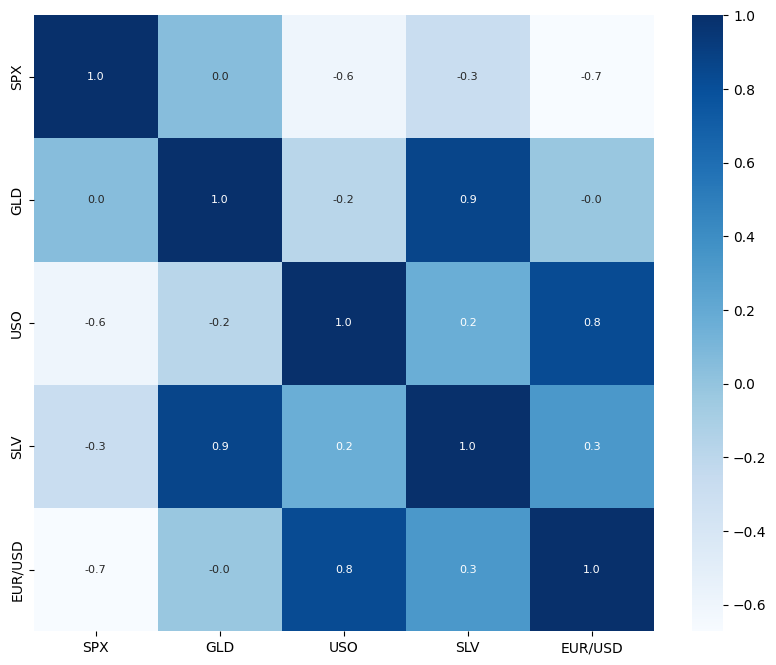

In [23]:
#construct a heatmap for corr
plt.figure(figsize=(10,8))
sbn.heatmap(corr_matrix,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

gold and silver values are positively correlated

In [24]:
#corr values of gold
corr_matrix["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-28-a3e98693fef2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["GLD"],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

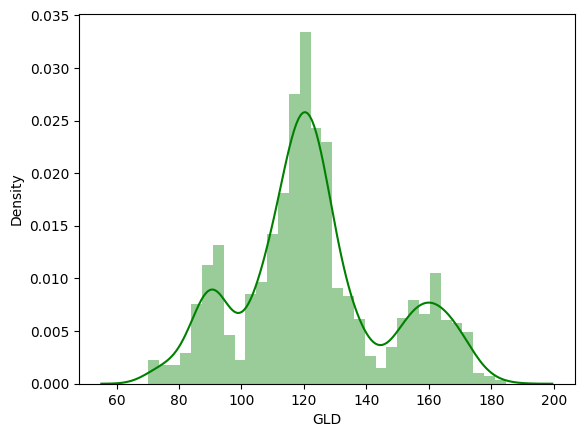

In [28]:
#check the distribution of gold price
sbn.distplot(df["GLD"],color="green")

In [32]:
#split as x and y
x=df.drop(["Date","GLD"],axis=1)
y=df["GLD"]

In [36]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [35]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [37]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
x_test.shape

(458, 4)

In [41]:
#model training
rfr_reg=RandomForestRegressor(n_estimators=100)

rfr_reg.fit(x_train,y_train)

y_predicted=rfr_reg.predict(x_test)

In [60]:
#values predicted
y_predicted

array([168.75250017,  81.75419986, 115.85790015, 127.77610087,
       120.6946014 , 154.87609738, 149.79409815, 125.98250058,
       117.46379876, 125.88070088, 116.41240107, 171.56560105,
       141.95879783, 168.08409867, 115.26000019, 117.3700005 ,
       138.45430359, 170.23440145, 159.63140272, 159.1296987 ,
       155.0978997 , 125.07810021, 175.51840007, 157.85730301,
       125.32470053,  93.74589977,  77.07990014, 120.71390024,
       119.15329953, 167.45810066,  88.04220095, 125.14180017,
        91.18080076, 117.76460012, 121.04919887, 136.72330222,
       115.41040111, 115.1232009 , 148.78129997, 107.44590125,
       104.42690251,  87.21839817, 126.48820098, 118.02329989,
       152.10479872, 119.53420028, 108.41079964, 108.05459811,
        93.283001  , 127.10559775,  74.86140047, 113.73059923,
       121.41520007, 111.23799931, 118.890999  , 120.2420995 ,
       159.03109979, 168.92830048, 147.04119703,  85.65789856,
        94.40060034,  86.76719902,  90.5604002 , 118.99

In [53]:
#r squared error

r2=metrics.r2_score(y_test,y_predicted)

In [57]:
r2

0.989191588609138

In [47]:
#mean squared error

mse=metrics.mean_squared_error(y_test,y_predicted)

In [48]:
mse

5.700826340500471

In [66]:
Y_test_list=list(y_test)

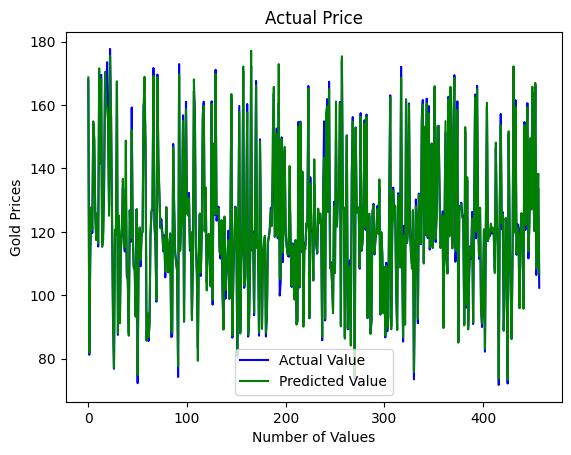

In [67]:
plt.plot(Y_test_list,color="blue",label="Actual Value")
plt.plot(y_predicted,color="green",label="Predicted Value")
plt.title("Actual Price")
plt.xlabel("Number of Values")
plt.ylabel("Gold Prices")
plt.legend()
plt.show()